<a href="https://colab.research.google.com/github/guilhermebioni/PUC-RJ_MVP/blob/main/Guilherme_Bioni_MVP_PUC_RJ_Machine_Learning_e_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Machine Learning e Analytics**

**Nome:** Guilherme Ferreira Bioni e Silva

**Matrícula:** 4052025000956

**Dataset:**
[Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

# **Descrição do Problema**

O Dataset proposto para este MVP inclui dados para a estimativa dos níveis de obesidade em indivíduos dos paíes México, Peru e Colômbia com base em seus hábitos alimentares e condições físicas. O objetivo principal do conjunto de dados é classificar os níveis de obesidade dos indíviduos em sete classes diferentes: Peso Insuficiente, Peso Normal, Sobrepeso Nível I, sobrepeso Nível II, Obesidade Tipo I, Obesidade tipo II, Obesidade Tipo III.

# Hipótese do Problema

Hábitos alimentares e físicos podem prever com precisão o nível de obesidade de um indivíduo?







# **Tipo de Problema**

Este é um problema de **classificação supervisionada**. Dado o conjunto de características, o objetivo é prever a qual das 7 classes um determinado indivíduo pertence. Com o objetivo de melhorar a assertividade do estudo, as 7 classes foram resumidas em apenas 4: Abaixo do peso, Peso Normal, Acima do Peso, Obeso.

# **Valor de Negócio**

Corpo e mente saudáveis são fundamentais para a uma melhor qualidade de vida e bom funcionamento do corpo humano. Neste contexto, o estudo proposto auxilia profissionais da saúde e pacientes a entenderem fatores rotineiros que interferem no peso corporal e bem-estar do indivíduo.

# Atributos do Conjunto de Dados

O conjunto de dados contém 17 atributos e 2111 instâncias. Atributos:


*   ***Gender*** (Gênero)
*   ***Age*** (Idade)
*   ***Height*** (Altura em metros)
*   ***Weight*** (Peso em Kg)
*   ***Family_history_with_overweight*** (Membro da família sofreu ou sofre de sobrepeso)
*   ***FAVC*** (Ingestão de alimentos altamente calóricos com frequência)
*   ***FCVC*** (Costume de ingerir vegetais nas refeições diariamente)
*   ***NCP*** (Quantiadade de refeições principais diárias)
*   ***CAEC*** (Quantiadade de refeições entre as refeições principais diárias)
*   ***SMOKE*** (Fumante ou não-fumante)
*   ***CH20*** (Consumo de água diário)
*   ***SCC*** (Monitoramento de calorias que ingere diariamente)
*   ***FAF*** (Frequência de prática de atividades físicas)
*   ***TUE*** (Tempo de uso de dispositivos tecnológicos diário)
*   ***CALC*** (Frequência de bebidas alcoólicas semanal)
*   ***MTRANS*** (Meio de transporte mais usado)
*   ***NObeyesdad*** (Nível de obesidade)

As colunas estão em inglês. Mais adiante iremos renomear para português.


# Importação das Bibliotecas Necessárias e Carga de Dados
Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

In [23]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.datasets import load_wine # para importar o dataset wine
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Funções Python

In [24]:
def aplicar_one_hot(df, colunas_categoricas, drop_first=False):
    """
    Aplica One-Hot Encoding usando sklearn OneHotEncoder e retorna um novo DataFrame.
    Parâmetros:
        df (pd.DataFrame): DataFrame original.
        colunas_categoricas (list): Lista de colunas categóricas para codificar.
        drop_first (bool): Se True, remove a primeira categoria (evita multicolinearidade).
    Retorna:
        pd.DataFrame: DataFrame com as colunas codificadas e unidas ao original.
    """

    colunas_validas = [col for col in colunas_categoricas if col in df.columns]

    encoder = OneHotEncoder(sparse_output=False, drop='first' if drop_first else None)

    dados_codificados = encoder.fit_transform(df[colunas_validas])
    nomes_colunas = encoder.get_feature_names_out(colunas_validas)
    df_codificado = pd.DataFrame(dados_codificados, columns=nomes_colunas, index=df.index)

    df_sem_categoricas = df.drop(columns=colunas_validas)
    base_modelo2 = pd.concat([df_sem_categoricas, df_codificado], axis=1)

    return base_modelo2

Importando DataSet

In [25]:
# url a importar
url_dados = 'https://raw.githubusercontent.com/guilhermebioni/PUC-RJ_MVP/refs/heads/main/ObesityDataSet_raw_and_data_sinthetic.csv'

# carga do dataset através da url
base = pd.read_csv(url_dados)

In [26]:
# 10 primeiras linhas do DataSet
base.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


O nome das colunas do DataSet estão em Inglês. Vamos renomear para tornar as análises mais intuitivas.

In [27]:
# Renomeando as Colunas do Dataset
# Renomeia várias colunas
base.rename(columns={'Gender': 'genero', 'Age': 'idade', 'Height': 'altura', 'Weight': 'peso', 'family_history_with_overweight': 'familiar_sobrepeso', 'FAVC': 'ali_calo_com_freq', 'FCVC': 'consumo_vegetais_dia',
                     'NCP': 'qtd_ref_principal', 'CAEC': 'qtd_ref_nao_principal', 'SMOKE': 'fumante', 'CH2O': 'consumo_agua_dia', 'SCC': 'monitoramento_caloria', 'FAF': 'freq_ativ_fisica',
                     'TUE': 'tempo_uso_disp_elet_dia', 'CALC': 'freq_bebida_alc_sem', 'MTRANS': 'transporte_usado', 'NObeyesdad': 'nivel_obesidade'}, inplace=True)


# Análise de Dados
Nesta etapa, iremos fazer uma análise de dados exploratória (EDA) sobre o dataset, visando entender a distribuição, as relações e as características das variáveis. Etapa crucial para seguirmos com as fases subsequentes de pré-processamento e modelagem.

# Total e Tipo de Instâncias
O DataSet tem 2.111 instâncias, 17 atributos e **não** possui valores nulos.


Divisão dos atributos:

8 atributos do tipo numérico (float).

9 atributos do tipo categórico (object).

In [28]:
print(base.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   genero                   2111 non-null   object 
 1   idade                    2111 non-null   float64
 2   altura                   2111 non-null   float64
 3   peso                     2111 non-null   float64
 4   familiar_sobrepeso       2111 non-null   object 
 5   ali_calo_com_freq        2111 non-null   object 
 6   consumo_vegetais_dia     2111 non-null   float64
 7   qtd_ref_principal        2111 non-null   float64
 8   qtd_ref_nao_principal    2111 non-null   object 
 9   fumante                  2111 non-null   object 
 10  consumo_agua_dia         2111 non-null   float64
 11  monitoramento_caloria    2111 non-null   object 
 12  freq_ativ_fisica         2111 non-null   float64
 13  tempo_uso_disp_elet_dia  2111 non-null   float64
 14  freq_bebida_alc_sem     

# Distribuição da Variável Resposta
A variável resposta do DataSet é o nível de obesidade e possui 7 classes.
Conforme explicado anteriormente, será criada uma nova variável resposta resumindo as classificações em apenas 4.

Nova variável = "classe_peso": Abaixo, Normal, Acima, Obeso

Verifica-se abaixo a distribuição desta nova variável.

A variável resposta nível de obesidade foi dividida em 7 níveis e possui bom balanceamento. Porém, vamos criar uma nova variável resposta agrupando os 7 níveis em apenas 4 com o objetivo de facilitar nossas análises.

Nova variável = "classe_peso": Abaixo, Normal, Acima, Obeso

Verificando a distribuição da nova variável resposta:

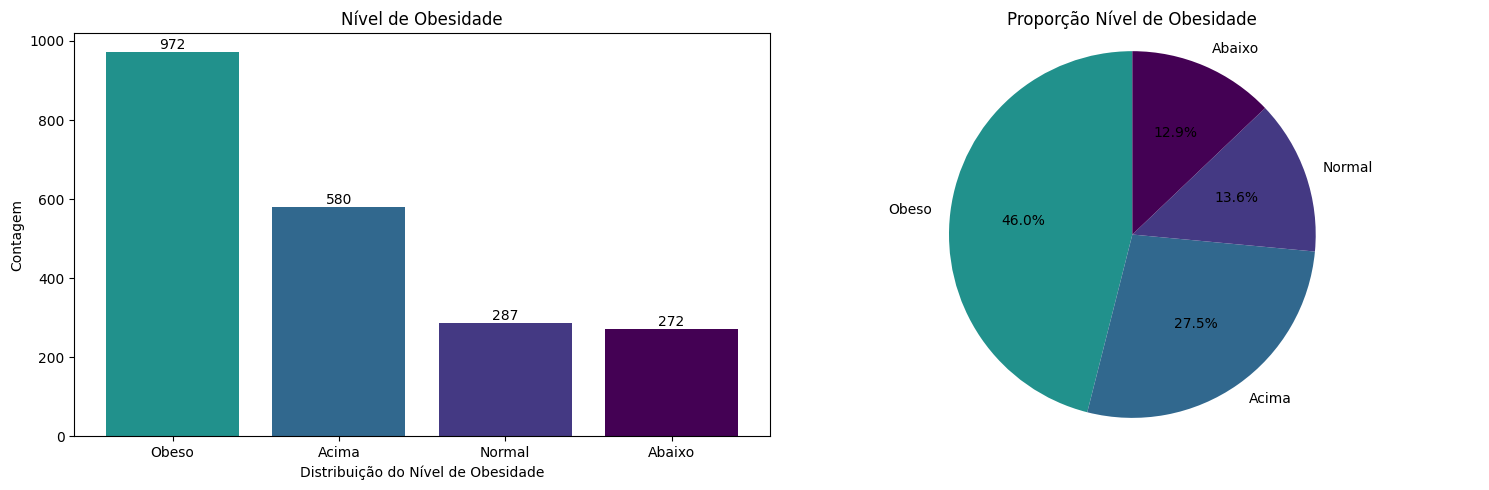

In [29]:
base['classe_peso'] = np.where(base['nivel_obesidade'] == 'Insufficient_Weight', 'Abaixo',
                               np.where(base['nivel_obesidade'] == 'Normal_Weight', 'Normal',
                                        np.where(base['nivel_obesidade'] == 'Overweight_Level_I', 'Acima',
                                                 np.where(base['nivel_obesidade'] == 'Overweight_Level_II', 'Acima', 'Obeso'))))

# Dados para os gráficos
novos_labels = ['Obeso', 'Acima', 'Normal', 'Abaixo' ]
n_contagem_valores = base['classe_peso'].value_counts() # Contagem dos níveis de obesidade
novo_proporcao = base['classe_peso'].value_counts(normalize=True) # Porporção dos níveis de obesidade
n_coresViridis = ['#21918c', '#31688e', '#443983', '#440154'] # Cores escolhidas para os gráficos

# Criando a figura e os subplots
fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(15, 5))  # Definindo tamanho da figura do gráfico. (1 linha, 2 colunas)

# Gráfico de barras
ax3.bar(novos_labels, n_contagem_valores, color=n_coresViridis)
ax3.bar_label(ax3.containers[0])
ax3.set_title('Nível de Obesidade') # Título do gráfico
ax3.set_xlabel('Distribuição do Nível de Obesidade') # Título do eixo X
ax3.set_ylabel('Contagem') # Título do eixo Y

# Gráfico de pizza
ax4.pie(novo_proporcao, labels=novos_labels, autopct='%1.1f%%', colors=n_coresViridis, startangle=90)
ax4.set_title('Proporção Nível de Obesidade')
ax4.axis('equal')  # A proporção de aspecto igual garante que a pizza seja desenhada como um círculo

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

A partir da nova variável resposta é possível verificar pelo gráfico acima que a base possui muitos indivíduos acima do peso (46%). Apenas 13% dos indivíduos estão no peso considerado normal.

_______________________________________________________________________________

# Estatísticas Descritivas
Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [30]:
# Estatísticas Descritivas Básicas do Dataset
# Sumário Estatístico
print("\nEstatísticas Descritivas:")
base.describe()


Estatísticas Descritivas:


,idade,altura,peso,consumo_vegetais_dia,qtd_ref_principal,consumo_agua_dia,freq_ativ_fisica,tempo_uso_disp_elet_dia
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [31]:
# exibindo as estatísticas descritivas da média de idade, peso e altura, agrupado por nível de obesidade
print("\nEstatísticas descritivas da média de idade, peso e altura, agrupado por nível de obesidade:")
selecionando_colunas = ['idade', 'peso', 'altura', 'classe_peso']
base_filtrada = base.filter(items=selecionando_colunas) # Selecionando apenas as colunas de interesse
base_filtrada['classe_peso_aju'] = np.where(base_filtrada['classe_peso'] == 'Abaixo', '01 - Abaixo',
                                            np.where(base_filtrada['classe_peso'] == 'Normal', '02 - Normal',
                                                     np.where(base_filtrada['classe_peso'] == 'Acima', '03 - Acima','04 - Obeso')))

base_filtrada_nova = base_filtrada[['classe_peso_aju', 'idade', 'peso', 'altura']]
base_filtrada_nova.groupby('classe_peso_aju').describe()



Estatísticas descritivas da média de idade, peso e altura, agrupado por nível de obesidade:


idade                                                   \
                 count       mean       std   min        25%        50%   
classe_peso_aju                                                           
01 - Abaixo      272.0  19.783237  2.669511  16.0  18.000000  19.244594   
02 - Normal      287.0  21.738676  5.096756  14.0  19.000000  21.000000   
03 - Acima       580.0  25.207328  7.373501  16.0  20.000000  22.570324   
04 - Obeso       972.0  25.806181  5.918980  15.0  21.681806  25.138276   

                                   peso              ...                     \
                       75%   max  count        mean  ...         75%    max   
classe_peso_aju                                      ...                      
01 - Abaixo      21.000000  39.0  272.0   49.906330  ...   53.667843   65.0   
02 - Normal      23.000000  61.0  287.0   62.155052  ...   68.500000   87.0   
03 - Acima       29.706826  56.0  580.0   78.176050  ...   85.000000  102.0   
04 - Obeso       27.933529  52.0  972.0  109.082344  ...  120.036606  173.0   

                altura                                                \
                 count      mean       std   min       25%       50%   
classe_peso_aju                                                        
01 - Abaixo      272.0  1.691117  0.099687  1.52  1.599267  1.704180   
02 - Normal      287.0  1.676585  0.094526  1.50  1.600000  1.660000   
03 - Acima       580.0  1.695792  0.093039  1.45  1.625727  1.700000   
04 - Obeso       972.0  1.715553  0.088995  1.50  1.640744  1.724095   

                                 
                      75%   max  
classe_peso_aju                  
01 - Abaixo      1.758308  1.90  
02 - Normal      1.750000  1.93  
03 - Acima       1.756606  1.93  
04 - Obeso       1.780193  1.98  

[4 rows x 24 columns]

A partir da tabela acima é possível verificar que os indivíduos acima do peso ('Acima' e 'Obeso') possuem uma média de idade mais alta em relação às demais classes.

# Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos dos níveis de obesidade possam ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

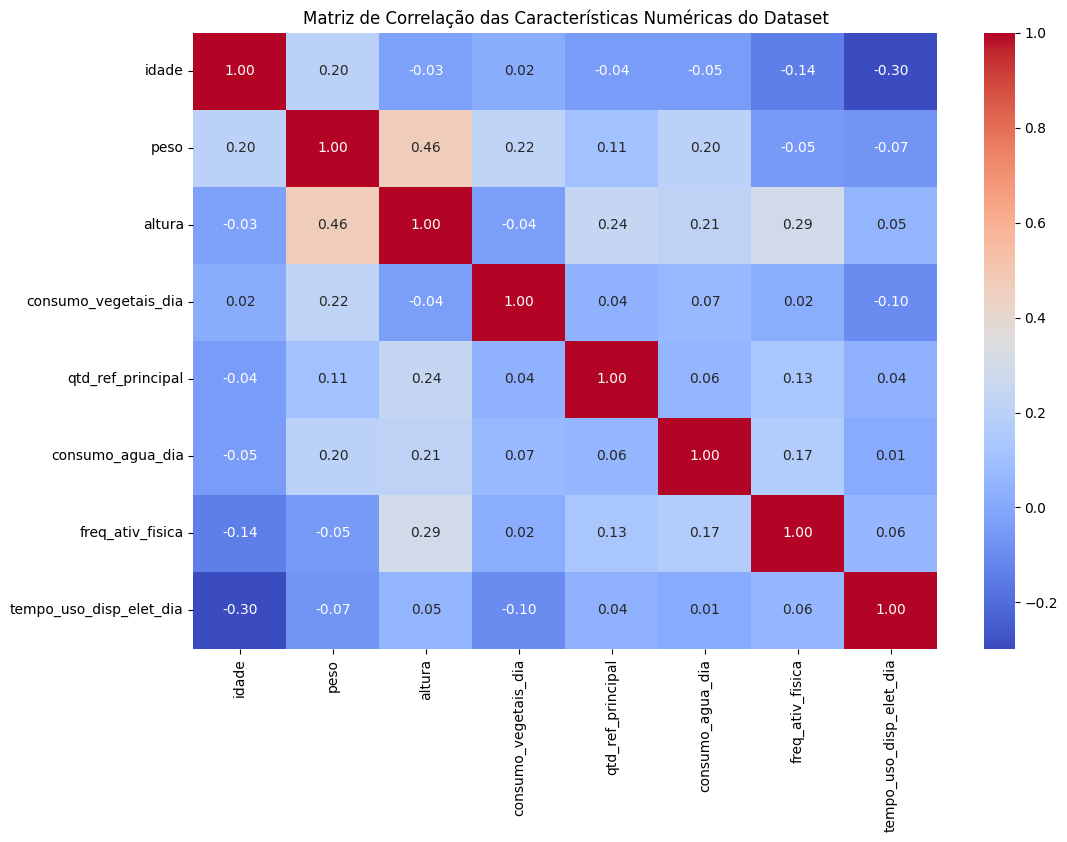

In [32]:
# Matriz de Correlação
selecionando_colunas_corr = ['idade', 'peso', 'altura', 'consumo_vegetais_dia', 'qtd_ref_principal', 'consumo_agua_dia', 'freq_ativ_fisica', 'tempo_uso_disp_elet_dia']
base_para_correlacao = base.filter(items=selecionando_colunas_corr) # Selecionando apenas as colunas de interesse
plt.figure(figsize=(12, 8))
sns.heatmap(base_para_correlacao.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Dataset')
plt.show()

O mapa de calor da matriz de correlação não revela correlação entre as variáveis. A correlação mais alta fica entre peso e altura, mas não pode ser considerada significativa.

# Tratamento e Pré-processamento de Dados

# Valores Nulos

In [33]:
# Verificando a presença de valores nulos no dataset original
print("Valores nulos no dataset:")
base.isnull().sum()

Valores nulos no dataset:


,0
genero,0
idade,0
altura,0
peso,0
familiar_sobrepeso,0
ali_calo_com_freq,0
consumo_vegetais_dia,0
qtd_ref_principal,0
qtd_ref_nao_principal,0
fumante,0


O dataset não possui valores nulos.

# Pré-Processamento de Dados
O pré-processamento de dados é importante etapa para preparar a base de dados para modelagem, garantindo que estejam no formato adequado e otimizados para o desempenho do algorismo.

# Criação de Recursos
Construção de Recursos: Para este dataset, a informação de IMC pode ser bastante importante. Trata-se de uma característica resumida utilizando os dados de peso e altura dos indivíduos. Por este motivo, vamos adicionar este atributo ao DataSet.

In [34]:
base['IMC'] = base['peso'] / base['altura']**2

base_modelo = base.drop(columns=['nivel_obesidade'])
base_modelo.head()

,genero,idade,altura,peso,familiar_sobrepeso,ali_calo_com_freq,consumo_vegetais_dia,qtd_ref_principal,qtd_ref_nao_principal,fumante,consumo_agua_dia,monitoramento_caloria,freq_ativ_fisica,tempo_uso_disp_elet_dia,freq_bebida_alc_sem,transporte_usado,classe_peso,IMC
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal,24.386526
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal,24.238227
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal,23.765432
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Acima,26.851852
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Acima,28.342381


# Transformação Categórica
One-hot Encoding

In [35]:
# Antes de iniciar o método de transformação One-hot encoding, vamos selecionar as variáveis categóricas desejadas
var_categoria = ['genero', 'familiar_sobrepeso', 'ali_calo_com_freq', 'qtd_ref_nao_principal', 'fumante', 'monitoramento_caloria', 'freq_bebida_alc_sem', 'transporte_usado']

# Aplicando One-Hot Encoding
base_modelo2 = aplicar_one_hot(base_modelo, var_categoria, drop_first=False)

In [36]:
print(base_modelo2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   idade                                   2111 non-null   float64
 1   altura                                  2111 non-null   float64
 2   peso                                    2111 non-null   float64
 3   consumo_vegetais_dia                    2111 non-null   float64
 4   qtd_ref_principal                       2111 non-null   float64
 5   consumo_agua_dia                        2111 non-null   float64
 6   freq_ativ_fisica                        2111 non-null   float64
 7   tempo_uso_disp_elet_dia                 2111 non-null   float64
 8   classe_peso                             2111 non-null   object 
 9   IMC                                     2111 non-null   float64
 10  genero_Female                           2111 non-null   floa

# Divisão da base
O DataSet pode ser dividido em base de treinamento e base de teste.

**Método Holdout**

In [37]:
# Separar atributos: variáveis explicativas (X)
# Separar target: Variável resposta (y)
X = base_modelo2.drop('classe_peso', axis=1)
y = base_modelo2['classe_peso']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=29, stratify=y) # faz a divisão

**Validação Cruzada**

In [38]:
# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

# Normalização
A normalização redimensiona os dados de um ou mais atributos do intervalo original para o intervalo entre 0 a 1, com o objetivo de alterar os valores para uma escala comum, sem distorcer as diferenças nos intervalos de valores.

Esta é uma boa técnica para usar quando não se conhece bem a distribuição dos dados ou quando se sabe que a distribuição não é gaussiana (normal).

In [39]:
# definindo o transformador como min max scaler
scaler = MinMaxScaler()

# transformando os dados
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelagem

**Escolher o melhor algoritmo para modelar**

Serão testados os seguintes algoritmos: KNN, NB, SVM

KNN: 0.834753 (0.027503)
NB: 0.691987 (0.043514)
SVM: 0.871495 (0.036854)


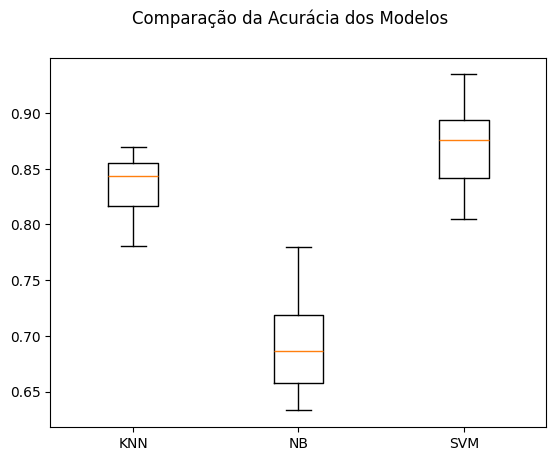

In [40]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(112)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Através dos resultados obtidos, é possível observar que o algoritmo SVM teve a melhor acurácia: 87,14%.

In [41]:
# Treinar um classificador (SVM)
algo_svm = SVC(random_state=112)
algo_svm.fit(X_train, y_train)

# fazer previsões
y_pred = algo_svm.predict(X_test)

**Matriz de Confusão**

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Abaixo       0.88      0.85      0.87        54
       Acima       0.86      0.91      0.89       116
      Normal       0.71      0.76      0.73        58
       Obeso       0.99      0.95      0.97       195

    accuracy                           0.90       423
   macro avg       0.86      0.87      0.86       423
weighted avg       0.91      0.90      0.90       423



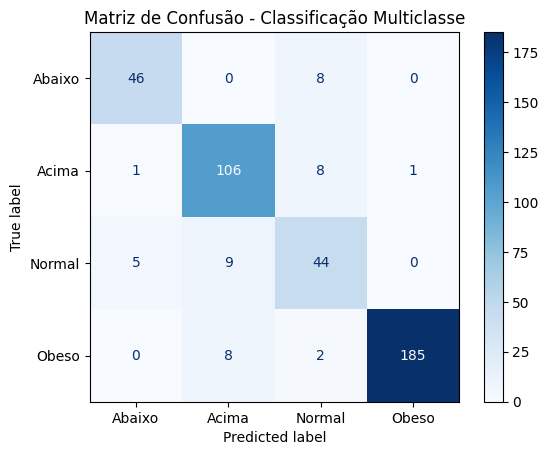

In [43]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
classe_nomes = np.unique(y_test)
# Exibir a matriz de confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classe_nomes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão - Classificação Multiclasse")
plt.show()

<Figure size 1000x600 with 0 Axes>

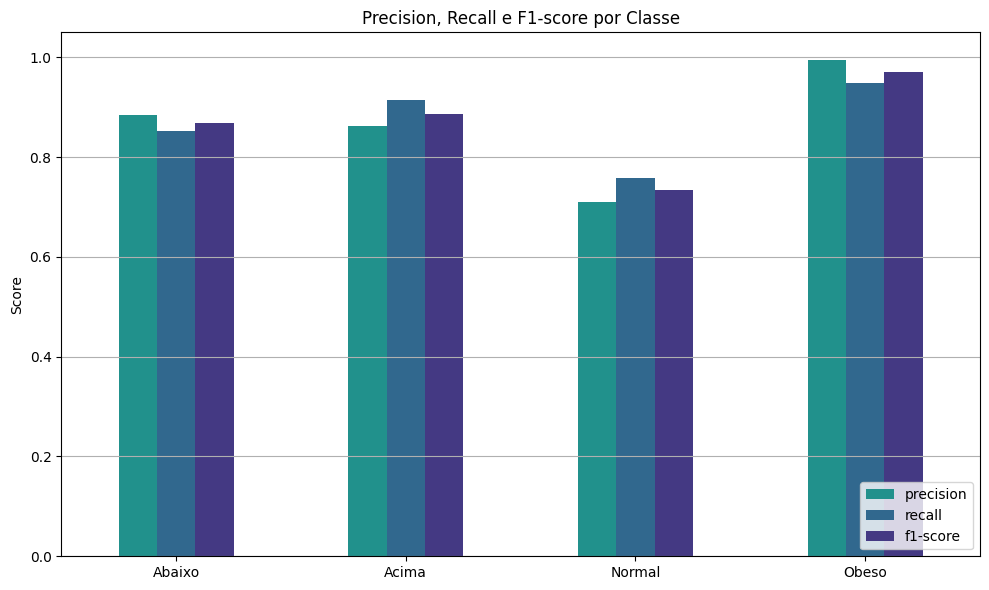

In [44]:
# Exemplo: caso você já tenha o y_test e y_pred
report = classification_report(y_test, y_pred, target_names=['Abaixo', 'Acima', 'Normal', 'Obeso'], output_dict=True)

# Transforma o dict em DataFrame
df_report = pd.DataFrame(report).transpose().iloc[:4]  # Pegando apenas as 4 classes
n2_coresViridis = ['#21918c', '#31688e', '#443983'] # Cores escolhidas para os gráficos

# Plotando
plt.figure(figsize=(10, 6))
df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,6), color=n2_coresViridis)
plt.title('Precision, Recall e F1-score por Classe')
plt.ylabel('Score')
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Conclusão**

O modelo tem ótimo desempenho geral, especialmente nas classes "Acima" e "Obeso".

A classe "Normal" é o ponto que ainda tem espaço para melhorias, pois embora tenha bom desempenho, é algumas vezes confundida com outras classes. Técnicas como SMOTE (oversampling) ou um modelo com mais capacidade de generalização - random forest, gradient boosting - podem melhorar a classe "Normal"

Hipótese: Hábitos alimentares e físicos podem prever com precisão o nível de obesidade de um indivíduo?

O modelo SVM tem ótima assertividade e é um bom preditor para classificar o nível de obesidade dos indivíduos através de dados de hábitos alimentares e físicos.

